# Introduction
Dimensionality reduction is the process of simplifying input data by reducing the feature set to only what is necessary to make predictions.

This decrease in input complexity usually reduces the output variability and complexity of the learning process.

[[1]](#1)

# The Covariance Matrix
The covariance matrix of a random vector is a square matrix which gives the covariance between each pair of elements and the variance of the elements along the diagonal.

It's usually the first step of dimensionality reduction because it gives you an idea of the number of features that are strongly related (and therefore, the number of features that you can discard) and the ones that are independent.

[[1]](#1)

## Covariance Matrix of Iris Dataset
[[1]](#1)

Previously, we've seen how to load a dataset using pandas. Here, we'll use scikit-learn's dataset loader, which returns a `sklearn.utils.Bunch` object rather than a `DataFrame`, although you can optionally get a `DataFrame` if you wish. This is simply an aesthetic choice, as scikit-learn handles the data fetching for us.

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

Compute the normalized covariance matrix.

In [ ]:
import numpy as np

cov_data = np.corrcoef(iris.data.T)

Let's take a look using a heatmap.

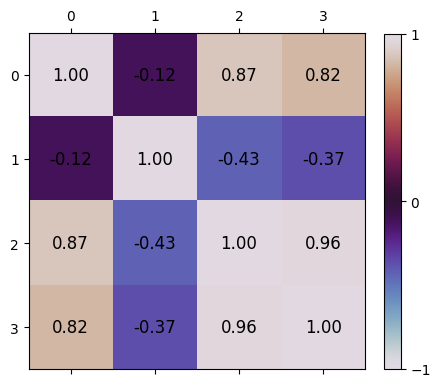

In [ ]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.twilight, vmin = -1, vmax = 1)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y],
                 size=12, color='black', ha="center", va="center")
plt.show()

We see a high correlation between the first and the third, the first and the fourth, and the third and the fourth features. Furthermore, we see that the second feature is nearly independent of the other features.

The features along the diagonal all have a variance of 1 because each feature covariance was normalized to 1.

# Principal Component Analysis
Principal Component Analysis (PCA) is a dimensionality reduction technique where the new features are linear combinations (rotations) of the original features. The principal components are vectors where the first contains most of the signal's variance (i.e. energy), the second contains most of the remaining energy, and so on. The set of principal components is orthogonal.

The key parameter to this technique is the number of basis vectors (principal components) to use.

The exact steps to compute the principal components are given in [[4]](#4). However, it is more important to understand the concept than the exact steps.

One must zero the mean and rescale the variance of the input data to 1 before performing PCA.

## PCA on Iris Dataset
Let's take two principal components from the data.

Note that `sklearn`'s PCA method only centers the mean of the input data. It does not normalize.

In [ ]:
from sklearn.decomposition import PCA

pca_2c = PCA(n_components = 2)
X_pca_2c = pca_2c.fit_transform(iris.data)

In [ ]:
print(X_pca_2c.shape)

(150, 2)


Then, let's plot the rotated input and see how much of the input variance (energy) is preserved.

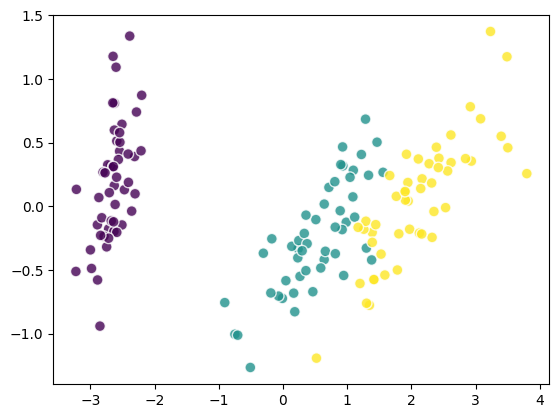

0.9776852063187977

In [ ]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c = iris.target,
            alpha = 0.8, s = 60, marker = 'o', edgecolors = 'white')
plt.show()

pca_2c.explained_variance_ratio_.sum()

With only two components, we are able to preserve nearly 98% of the input variance.

The transformation matrix, which projects the original feature space to the reduced feature space, can be seen as follows.

In [ ]:
pca_2c.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

A trick to get a desired preserved variance is to specify a decimal number for `n_components`.

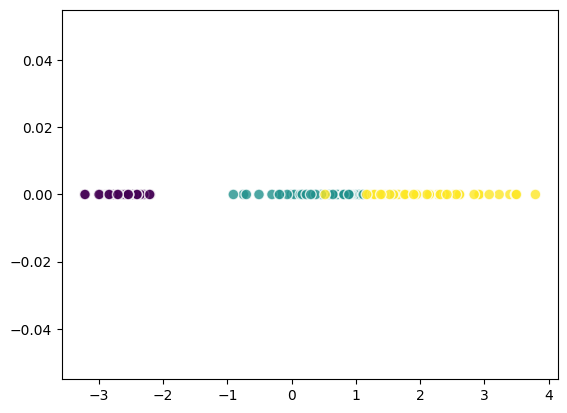

0.924618723201734
(150, 1)


In [ ]:
pca_90pc = PCA(n_components = 0.9)
X_pca_90pc = pca_90pc.fit_transform(iris.data)

plt.scatter(X_pca_90pc[:,0], np.zeros(X_pca_90pc.shape),
            c = iris.target, alpha = 0.8, s = 60,
            marker = 'o', edgecolors = 'white')
plt.show()

print(pca_90pc.explained_variance_ratio_.sum())
print(X_pca_90pc.shape)

## PCA Whitening
PCA may not be effective enough, especially when dealing with high dimensionality data because the features may be very correlated with an unbalanced variance.

A possible solution for this scenario is to whiten (i.e. sphere) the signal, making the input less redundant. Specfically, we wish to make the features less correlated with each other and have the same variance.
1. The first goal has already been completed, as the non-diagonal values of the covariance matrix of the transformed input data are zero; thus the features are uncorrelated.
2. We can make our input features have unit variances by rescaling each feature by $1/\sqrt{\lambda_i}$, where $\lambda_i$ are the corresponding singular values to $x_{\text{rot},i}$.

PCA whitening can be done with `sklearn.decomposition.PCA` by passing the argument `whiten = True`.

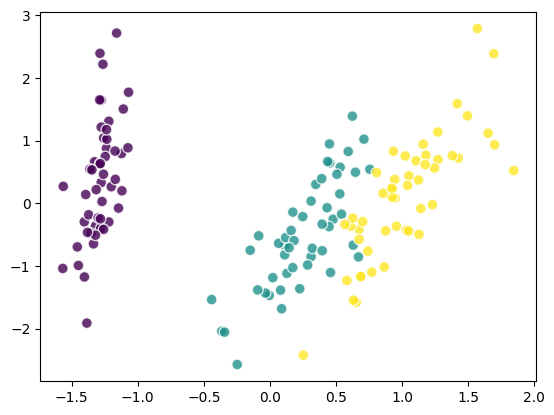

0.9776852063187977

In [ ]:
pca_2c_whitened = PCA(n_components = 2, whiten = True)
X_pca_2c_whitened = pca_2c_whitened.fit_transform(iris.data)
X_pca_2c_whitened.shape

plt.scatter(X_pca_2c_whitened[:,0], X_pca_2c_whitened[:,1], c = iris.target,
            alpha = 0.8, s = 60, marker = 'o', edgecolors = 'white')
plt.show()

pca_2c_whitened.explained_variance_ratio_.sum()

It appears that whitening this input data didn't change the preserved variance at all.

## Further Reading
For those inclined, read "PCA Whitening" and "CS229 Lecture notes: Principal components analysis" by Andrew Ng, referenced below.

# RandomizedPCA
PCA uses singular value decomposition (SVD) to compute principal components. SVD is an expensive process and, thus, difficult to use on large datasets.

RandomizedPCA uses randomized SVD, a lighter approximation of SVD, instead. RandomizedPCA is a good choice for large datasets.

In [ ]:
from sklearn.decomposition import PCA

rpca_2c = PCA(svd_solver='randomized', n_components=2)
X_rpca_2c = rpca_2c.fit_transform(iris.data)

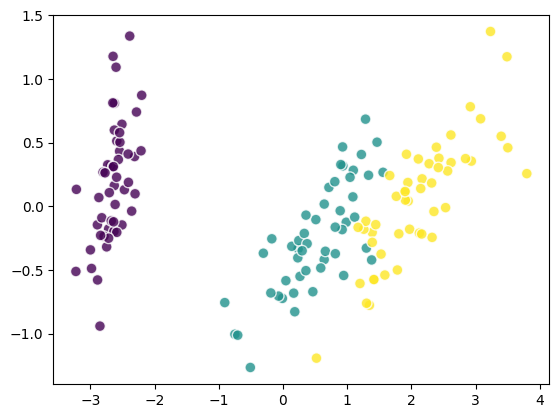

0.9776852063187954


In [ ]:
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1],
            c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
print(rpca_2c.explained_variance_ratio_.sum())

In [ ]:
pca_2c.explained_variance_ratio_.sum()-rpca_2c.explained_variance_ratio_.sum()

2.3314683517128287e-15

We can see that the explained variance ratio of RandomizedPCA was extremely close to that of PCA.

# Latent Factor Analysis (LFA)
Latent factor analysis (LFA) is similar to PCA except there is no orthogonal decomposition of the input signal, and therefore, no output basis.

LFA is used when a latent factor is expected to be present in the system. It is generally assumed that the latent factor has a Gaussian distribution and a unitary covariance. Therefore, in this case, instead of collapsing the energy/variance of the signal, the covariance among the variables is explained in the output dataset.

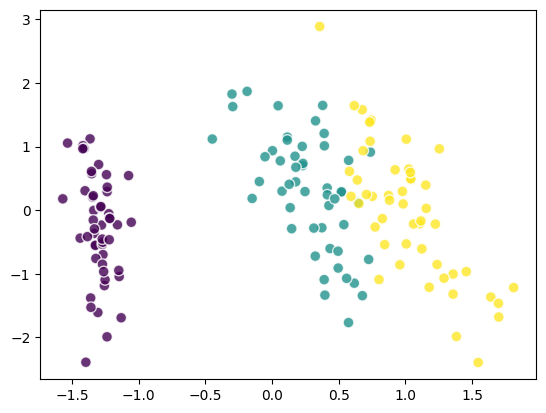

In [ ]:
from sklearn.decomposition import FactorAnalysis

fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1],
            c=iris.target, alpha=0.8, s=60,
            marker='o', edgecolors='white')
plt.show()

# Linear Discriminant Analysis (LDA)
LDA is a classifier but is often used for dimensionality reduction. LDA outputs linear combinations of the input features, trying to model the difference between the classes that best discriminate them.

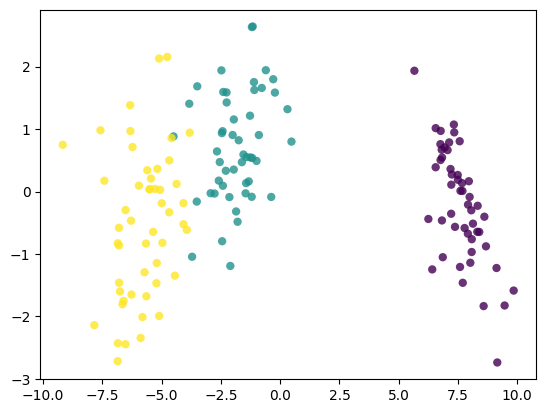

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_2c = LinearDiscriminantAnalysis(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:,0], X_lda_2c[:,1],
            c=iris.target, alpha=0.8, edgecolors='none')

plt.show()

# Latent semantical analysis (LSA)
Typically, latent semantical analysis (LSA) is applied to text after it has been processed by `TfidfVectorizer` or `CountVectorizer`. Compared to PCA, it applies SVD to the input dataset (which is usually a sparse matrix), producing semantic sets of words that are usually associated with the same concept. This is why LSA is used when the features are homogeneous (that is, all the words in the documents) and are present in large numbers.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)

tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)

tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)
arr_vec = np.array(tf_vect.get_feature_names_out())
arr_vec[tsvd_2c.components_[20].argsort()[-10:][::-1]]

array(['jupiter', 'sq', 'zisfein', 'comet', 'jim', 'of', 'gehrels',
       'gene', 'omen', 'are'], dtype=object)

# Independent component analysis (ICA)
Independent component analysis (ICA) is an approach
where you try to derive independent components from the input signal. In fact, ICA allows you to create maximally independent additive subcomponents from the initial multivariate input signal.

The main hypothesis of this technique focuses on the statistical independence of the subcomponents and their non-Gaussian distribution.

ICA has a lot of applications in neurological data and is widely used in the neuroscience domain. Another use is blind source separation. For example,
two or more microphones will record two sounds (for instance, a person speaks and a song plays at the same time). In this case, ICA is able to separate the two sounds into two output features.

# Kernel Principal Component Analysis
Kernel PCA is an extension of PCA that uses an often non-linear kernel to map the signal on, rather than a linear subspace.

## Demo with RBF Kernel
Say we have some disk-shaped data.

Code: [[1]](#1)

In [ ]:
def circular_points(radius, N):
           return np.array([[np.cos(2 * np.pi * t / N) * radius,
                             np.sin(2 * np.pi * t / N) * radius] for t in range(N)])
N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points),
                                circular_points(5.0, N_points)])
fake_circular_data += np.random.rand(*fake_circular_data.shape)
fake_circular_target = np.array([0] * N_points + [1] * N_points)
plt.scatter(fake_circular_data[:, 0], fake_circular_data[:, 1],
            c = fake_circular_target, alpha = 0.8,
            s = 60, marker = 'o', edgecolors = 'white')
plt.show()

We can separate the points using a nonlinear kernel, the radial basis function (RBF).

In [ ]:
from sklearn.decomposition import KernelPCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)
plt.scatter(X_kpca_2c[:,0], X_kpca_2c[:,1], c=fake_circular_target,
            alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

# T-distributed Stochastic Neighbor Embedding (T-SNE)
T-SNE is designed with the goal of embedding high-dimensional data in a 2-D or 3-D space to make the most of a scatterplot. It is a nonlinear dimensionality reduction technique based on two rules:
1. Recurrent similar observations must have a greater contribution to the output (and that's achieved with a probability distribution function)
2. The distribution in the high-dimensional space must be similar to the one in the small space (and that's achieved by minimizing the Kullback-Leibler (KL), divergence between the two probability distribution functions)


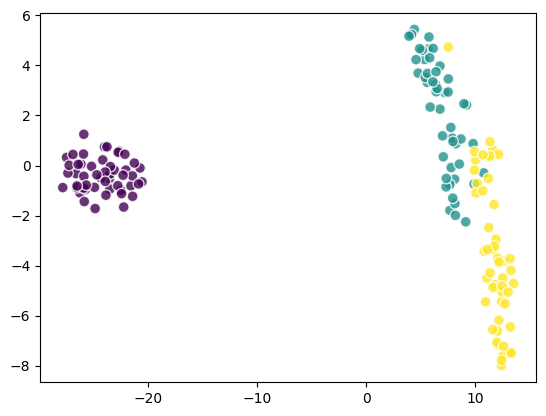

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
X_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.8,
            s=60, marker='o', edgecolors='white')

plt.show()

# Restricted Boltzmann Machine (RBM)
The RBM is another technique that creates a nonlinear transformation of the input data. The hidden units represent the status of the system, and the output dataset is actually the status of that layer.
The main hypothesis of this technique is that the input dataset is composed of features that represent probability (binary values or real values in the [0,1] range), since RBM is a probabilistic approach.

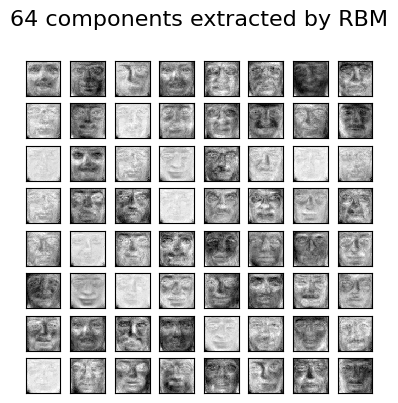

In [ ]:
from sklearn import preprocessing
from sklearn.neural_network import BernoulliRBM

n_components = 64 # Try with 64, 100, 144
olivetti_faces = datasets.fetch_olivetti_faces()
X = preprocessing.binarize(
    preprocessing.scale(olivetti_faces.data.astype(float)),
    threshold=0.5)
rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01,
                   n_iter=100)
rbm.fit(X)
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(int(np.sqrt(n_components+1)),
                int(np.sqrt(n_components+1)), i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(()); plt.yticks(())

plt.suptitle(str(n_components) + ' components extracted by RBM',
             fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

# References
<a id="1">[1]</a>
A. Boschetti, L. Massaron. Python Data Science Essentials. 2015. Available: https://aaronyeo.org/books_/Data_Science/Python/Python%20Data%20Science%20Essentials.pdf

<a id="2">[2]</a>
A. Ng, et al. PCA Whitening. Available: http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

<a id="3">[3]</a>
A. Ng. CS229 Lecture notes: Principal components analysis. 2020. Available: https://cs229.stanford.edu/notes2020spring/cs229-notes10.pdf

<a id="4">[4]</a>
Caltech PMA. Covariance and Principal Component Analysis (PCA). 2015. Available: http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf